In [1]:
import torch.nn as nn 
import torchvision
import torch 
from glob import glob
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy.stats as st

In [2]:
df = pd.read_csv("/home/shirshak/BPEye_Project_2024/zzz_tests/df_H_W_Mean-Intensity_labels.csv")
# df = df.drop(columns=["Mean Intensity Value R,G,B", "Mean Intensity Value", "label"], axis=1)
# df = df[:3000]

212 4000 320 6000


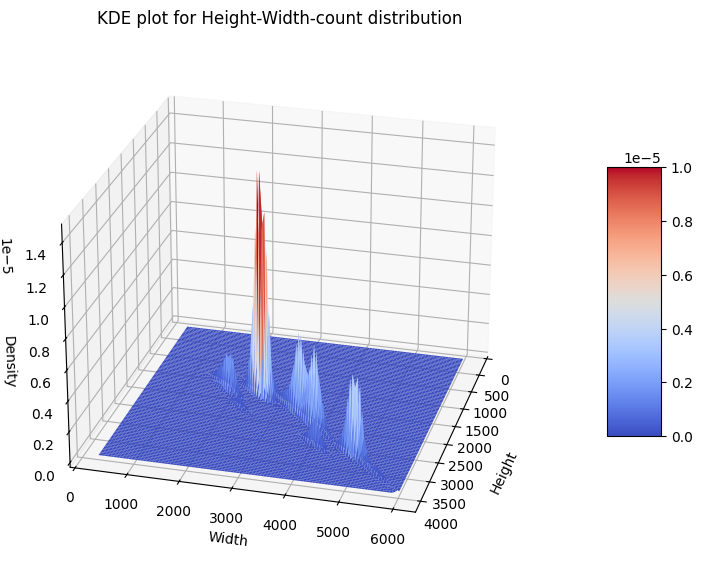

In [30]:
# Extract x and y
x = df['height']
y = df['width']
# Define the borders
# deltaX = (max(x) - min(x))/10
# deltaY = (max(y) - min(y))/10
xmin = min(x) #- deltaX
xmax = max(x) #+ deltaX
ymin = min(y) #- deltaY
ymax = max(y) #+ deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(15, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Height', labelpad=10)
ax.set_ylabel('Width')
ax.set_zlabel('Density')
ax.set_title('KDE plot for Height-Width-count distribution')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(25, 15)

In [4]:
print(xmin, xmax, ymin, ymax)

212 4000 320 6000


/tmp/ipykernel_2184358/3505185102.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(['Height Range', 'Width Range']).size().reset_index(name='Count')


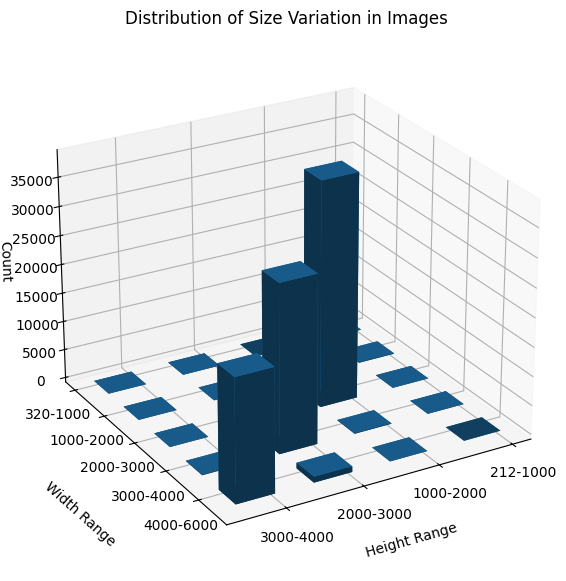

In [5]:
# Define range buckets for height and width
height_bins = [xmin, 1000, 2000, 3000, xmax]
width_bins = [ymin, 1000, 2000, 3000, 4000, ymax]

# Add bucketed columns
df['Height Range'] = pd.cut(df['height'], bins=height_bins, labels=[f"{xmin}-1000","1000-2000", "2000-3000", f"3000-{xmax}"])
df['Width Range'] = pd.cut(df['width'], bins=width_bins, labels=[f"{ymin}-1000","1000-2000", "2000-3000", "3000-4000", f"4000-{ymax}"])

# Count combinations of height and width ranges
count_data = df.groupby(['Height Range', 'Width Range']).size().reset_index(name='Count')

# Prepare data for 3D plotting
height_categories = np.array([f"{xmin}-1000","1000-2000", "2000-3000", f"3000-{xmax}"])
width_categories = np.array([f"{ymin}-1000","1000-2000", "2000-3000", "3000-4000", f"4000-{ymax}"])
height_indices = {cat: i for i, cat in enumerate(height_categories)}
width_indices = {cat: i for i, cat in enumerate(width_categories)}

count_data['Height Index'] = count_data['Height Range'].map(height_indices)
count_data['Width Index'] = count_data['Width Range'].map(width_indices)

# Extract x, y, z data for plotting
x = count_data['Height Index']
y = count_data['Width Index']
z = count_data['Count']

# Create 3D plot
fig = plt.figure(figsize=(18, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.bar3d(x, y, np.zeros(len(z)), 0.5, 0.5, z, shade=True)

# Set tick labels for categorical axes
ax.set_xticks(range(len(height_categories)))
ax.set_xticklabels(height_categories)
ax.set_yticks(range(len(width_categories)))
ax.set_yticklabels(width_categories)

# Set axis labels
ax.set_xlabel('Height Range', labelpad=10)
ax.set_ylabel('Width Range', labelpad=20)
ax.set_zlabel('Count')

# ax.tick_params(axis='x', pad=10)
# ax.tick_params(axis='y', pad=10)

ax.view_init(25, 60)
plt.title('Distribution of Size Variation in Images')
plt.show()

In [6]:
df

,Image Name,height,width,label,Mean Intensity Value,"Mean Intensity Value R,G,B",Height Range,Width Range
0,TRAIN000000.jpg,1944,2592,NRG,56.606407,"[77.21673583984375, 57.337989807128906, 35.264...",1000-2000,2000-3000
1,TRAIN000001.jpg,2592,3888,NRG,65.608154,"[91.38524627685547, 61.84443283081055, 43.5947...",2000-3000,3000-4000
2,TRAIN000002.jpg,2592,3888,NRG,48.811226,"[53.28090286254883, 47.730934143066406, 45.421...",2000-3000,3000-4000
3,TRAIN000003.jpg,1944,2592,NRG,20.442261,"[27.212238311767578, 22.1032657623291, 12.0112...",1000-2000,2000-3000
4,TRAIN000004.jpg,2136,3216,NRG,55.247509,"[84.73458862304688, 51.24260711669922, 29.7653...",2000-3000,3000-4000
...,...,...,...,...,...,...,...,...
101437,TRAIN101315.jpg,2304,3456,RG,43.307888,"[49.543182373046875, 41.28213119506836, 39.098...",2000-3000,3000-4000
101438,TRAIN101358.jpg,2592,3888,RG,32.781189,"[39.71892166137695, 28.24533462524414, 30.3793...",2000-3000,3000-4000
101439,TRAIN101362.jpg,2300,2300,RG,62.670940,"[100.87164306640625, 60.59642028808594, 26.544...",2000-3000,2000-3000
101440,TRAIN101367.jpg,3168,4752,RG,33.610477,"[39.64241027832031, 33.238243103027344, 27.950...",3000-4000,4000-6000


In [15]:
print(f"Count of height[{xmin}-1000] & width[{ymin}-1000] : {((df['Height Range'] == f'{xmin}-1000') & (df['Width Range'] == f'{ymin}-1000')).sum()}")
print(f"Count of height[1000-2000] & width[2000-3000] : {((df['Height Range'] == f'1000-2000') & (df['Width Range'] == f'2000-3000')).sum()}")
print(f"Count of height[2000-3000] & width[3000-4000] : {((df['Height Range'] == f'2000-3000') & (df['Width Range'] == f'3000-4000')).sum()}")
print(f"Count of height[3000-4000] & width[4000-6000] : {((df['Height Range'] == f'3000-4000') & (df['Width Range'] == f'4000-6000')).sum()}")
print(f"Count of height[2000-3000] & width[2000-3000] : {((df['Height Range'] == f'2000-3000') & (df['Width Range'] == f'2000-3000')).sum()}")
print(f"Count of height[2000-3000] & width[4000-6000] : {((df['Height Range'] == f'2000-3000') & (df['Width Range'] == f'4000-6000')).sum()}")

Count of height[212-1000] & width[320-1000] : 6
Count of height[1000-2000] & width[2000-3000] : 38835
Count of height[2000-3000] & width[3000-4000] : 28908
Count of height[3000-4000] & width[4000-6000] : 21122
Count of height[2000-3000] & width[2000-3000] : 1718
Count of height[2000-3000] & width[4000-6000] : 952


In [34]:
df['Mean Intensity Value'].min(), df['Mean Intensity Value'].max()

(3.4667911529541016, 172.4198455810547)

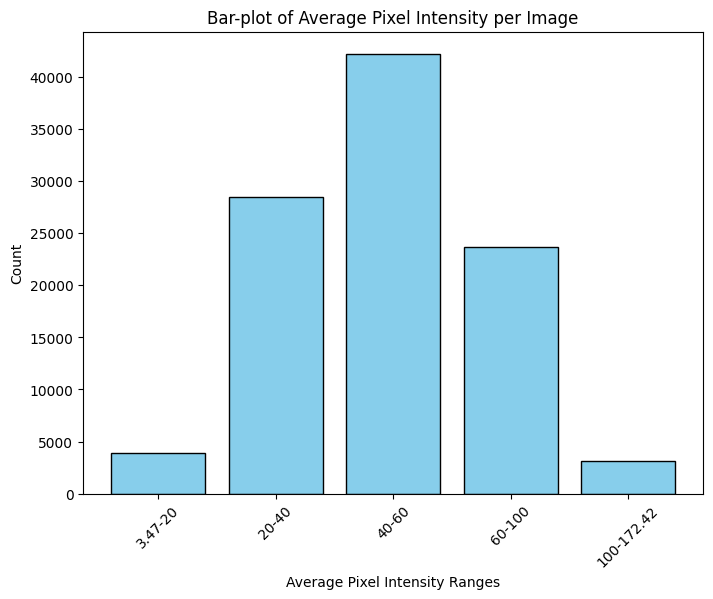

In [ ]:
intensity_min = df['Mean Intensity Value'].round(2).min()
intensity_max = df['Mean Intensity Value'].round(2).max()

bins = [intensity_min, 20, 40, 60, 100, intensity_max]
labels = [f'{intensity_min}-20', '20-40', '40-60', '60-100', f'100-{intensity_max}']

# Create a new column for the bucket ranges
df['Intensity Range'] = pd.cut(df['Mean Intensity Value'], bins=bins, labels=labels, include_lowest=True)

# Count the number of images in each bucket
distribution = df['Intensity Range'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(distribution.index, distribution.values, color='skyblue', edgecolor='black')
plt.xlabel('Avg. Pixel Intensity Range')
plt.ylabel('Count')
plt.title('Average Pixel Intensity per Image')
plt.xticks(rotation=45)
plt.show()

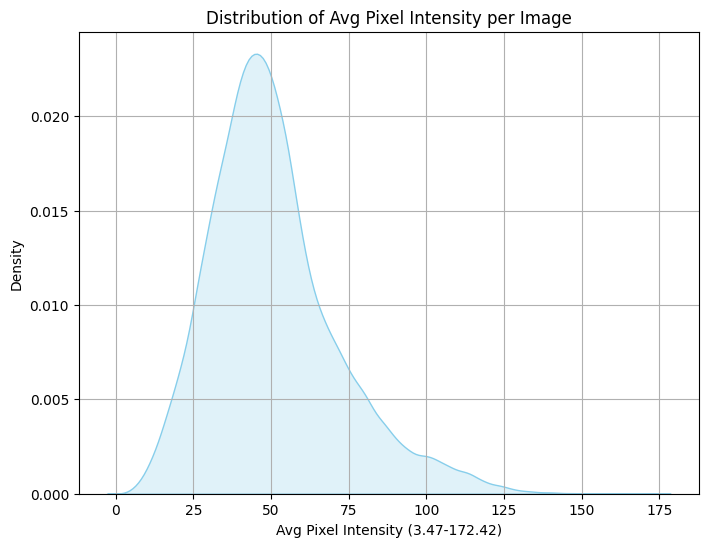

In [40]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Mean Intensity Value'], fill=True, color='skyblue')

# Add labels and title
plt.xlabel(f'Avg Pixel Intensity ({intensity_min}-{intensity_max})')
plt.ylabel('Density')
plt.title('Distribution of Avg Pixel Intensity per Image')
plt.grid(True)
plt.show()

In [45]:
df[(df['Mean Intensity Value'].round(2) == 3.47)]

,Image Name,height,width,label,Mean Intensity Value,"Mean Intensity Value R,G,B",Height Range,Width Range,Intensity Range
7234,TRAIN007472.jpg,1920,2560,NRG,3.466791,"[3.480370283126831, 4.10839319229126, 2.811609...",1000-2000,2000-3000,NaN


In [46]:
df[(df['Mean Intensity Value'].round(2) == 172.42)]

,Image Name,height,width,label,Mean Intensity Value,"Mean Intensity Value R,G,B",Height Range,Width Range,Intensity Range
92012,TRAIN095084.jpg,2336,3504,NRG,172.419846,"[187.03688049316406, 168.8406524658203, 161.38...",2000-3000,3000-4000,100-172.42
